In [1]:
import numpy as np
import pandas as pd

In [7]:
from google.colab import drive
drive.mount('/content/drive')

movies = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Movie_Recommondation_system/dataset_movie_re_system/tmdb_5000_movies.csv')
credits = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Movie_Recommondation_system/dataset_movie_re_system/tmdb_5000_credits.csv')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [9]:
credits.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [10]:
merged_df = movies.merge(credits, on='title', how='left')  # Merge movies and credits


In [11]:
print(movies.columns)

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count'],
      dtype='object')


In [12]:
# Merge the DataFrames and check for renamed columns
merged_df = movies.merge(credits, on='title')
print(merged_df.columns)

Index(['budget', 'genres', 'homepage', 'id', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count', 'movie_id', 'cast', 'crew'],
      dtype='object')


In [13]:
merged_df = movies.merge(credits, on='title', how='left')  # Merge movies and credits


In [14]:
# To show all columns
pd.set_option('display.max_columns', None)

# Then view the first row
print(movies.head(1))


      budget                                             genres  \
0  237000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   

                      homepage     id  \
0  http://www.avatarmovie.com/  19995   

                                            keywords original_language  \
0  [{"id": 1463, "name": "culture clash"}, {"id":...                en   

  original_title                                           overview  \
0         Avatar  In the 22nd century, a paraplegic Marine is di...   

   popularity                               production_companies  \
0  150.437577  [{"name": "Ingenious Film Partners", "id": 289...   

                                production_countries release_date     revenue  \
0  [{"iso_3166_1": "US", "name": "United States o...   2009-12-10  2787965087   

   runtime                                   spoken_languages    status  \
0    162.0  [{"iso_639_1": "en", "name": "English"}, {"iso...  Released   

                       tagline   title 

In [15]:
movies = merged_df[['movie_id', 'title', 'overview', 'genres', 'keywords', 'cast', 'crew']]


In [16]:

print(movies.columns)


Index(['movie_id', 'title', 'overview', 'genres', 'keywords', 'cast', 'crew'], dtype='object')


In [17]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4809 entries, 0 to 4808
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   movie_id  4809 non-null   int64 
 1   title     4809 non-null   object
 2   overview  4806 non-null   object
 3   genres    4809 non-null   object
 4   keywords  4809 non-null   object
 5   cast      4809 non-null   object
 6   crew      4809 non-null   object
dtypes: int64(1), object(6)
memory usage: 263.1+ KB


In [18]:
movies.head()


,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...","[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...","[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...","[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"John Carter is a war-weary, former military ca...","[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...","[{""id"": 818, ""name"": ""based on novel""}, {""id"":...","[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [19]:
movies.isnull().sum()


,0
movie_id,0
title,0
overview,3
genres,0
keywords,0
cast,0
crew,0


In [20]:
movies.dropna(inplace=True)


<ipython-input-20-4d2d825739df>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies.dropna(inplace=True)


In [21]:
movies.duplicated().sum()


0

In [22]:
movies.iloc[0].genres #the genres of the first movie

'[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]'

In [23]:

import ast

def convert(obj):

  if isinstance(obj, list):
    L = []
    for i in obj:

      if isinstance(i, dict):
        L.append(i['name'])
      else:
        L.append(i) # Append the element as is if it's not a dictionary
    return L
  else:
    L = []
    for i in ast.literal_eval(obj):
      L.append(i['name'])
    return L


In [24]:
movies['genres'] = movies['genres'].apply(convert)
movies.head()

<ipython-input-24-347b79119f07>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies['genres'] = movies['genres'].apply(convert)


,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]","[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...","[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Adventure, Fantasy, Action]","[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...","[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,"[Action, Adventure, Crime]","[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...","[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...,"[Action, Crime, Drama, Thriller]","[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...","[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"John Carter is a war-weary, former military ca...","[Action, Adventure, Science Fiction]","[{""id"": 818, ""name"": ""based on novel""}, {""id"":...","[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


In [31]:
movies['keywords'] = movies['keywords'].apply(convert)
movies.head()

<ipython-input-31-0e5a44efc6a8>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies['keywords'] = movies['keywords'].apply(convert)


,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"In the 22nd century, a paraplegic Marine is di...","[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[Sam Worthington, Zoe Saldana, Sigourney Weaver]",[James Cameron]
1,285,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...","[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","[Johnny Depp, Orlando Bloom, Keira Knightley]",[Gore Verbinski]
2,206647,Spectre,A cryptic message from Bond’s past sends him o...,"[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...","[Daniel Craig, Christoph Waltz, Léa Seydoux]",[Sam Mendes]
3,49026,The Dark Knight Rises,Following the death of District Attorney Harve...,"[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i...","[Christian Bale, Michael Caine, Gary Oldman]",[Christopher Nolan]
4,49529,John Carter,"John Carter is a war-weary, former military ca...","[Action, Adventure, Science Fiction]","[based on novel, mars, medallion, space travel...","[Taylor Kitsch, Lynn Collins, Samantha Morton]",[Andrew Stanton]


In [32]:
#here we only show 3 cast member

import ast
def convert3(obj):
  L = []
  counter = 0
  for i in ast.literal_eval(obj):
    if counter != 3:
      L.append(i['name'])
      counter+=1
    else:
      break
  return L

movies['cast'] = movies['cast'].apply(convert3)
movies.head()

ValueError: malformed node or string: ['Sam Worthington', 'Zoe Saldana', 'Sigourney Weaver']

In [29]:
import ast
def fetch_director(obj):
  L = []
  for i in ast.literal_eval(obj):
    if i['job'] == 'Director':
      L.append(i['name'])
      break
  return L
movies['crew'] = movies['crew'].apply(fetch_director)



ValueError: malformed node or string: ['James Cameron']

In [ ]:
# Check if the value is a string before applying split()
movies['overview'] = movies['overview'].fillna('').apply(lambda x: x.split() if isinstance(x, str) else x)
movies.head()

<ipython-input-57-0d578fc0a491>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies['overview'] = movies['overview'].fillna('').apply(lambda x: x.split() if isinstance(x, str) else x)


,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin...","[Action, Adventure, Fantasy, Science Fiction]","[culture clash, future, space war, space colon...","[Sam Worthington, Zoe Saldana, Sigourney Weaver]",[James Cameron]
1,285,Pirates of the Caribbean: At World's End,"[Captain, Barbossa,, long, believed, to, be, d...","[Adventure, Fantasy, Action]","[ocean, drug abuse, exotic island, east india ...","[Johnny Depp, Orlando Bloom, Keira Knightley]",[Gore Verbinski]
2,206647,Spectre,"[A, cryptic, message, from, Bond’s, past, send...","[Action, Adventure, Crime]","[spy, based on novel, secret agent, sequel, mi...","[Daniel Craig, Christoph Waltz, Léa Seydoux]",[Sam Mendes]
3,49026,The Dark Knight Rises,"[Following, the, death, of, District, Attorney...","[Action, Crime, Drama, Thriller]","[dc comics, crime fighter, terrorist, secret i...","[Christian Bale, Michael Caine, Gary Oldman]",[Christopher Nolan]
4,49529,John Carter,"[John, Carter, is, a, war-weary,, former, mili...","[Action, Adventure, Science Fiction]","[based on novel, mars, medallion, space travel...","[Taylor Kitsch, Lynn Collins, Samantha Morton]",[Andrew Stanton]


In [ ]:
# remove name space to search easily find data

movies['genres'] = movies['genres'].apply(lambda x:[i.replace(" ","") for i in x])
movies['keywords'] = movies['keywords'].apply(lambda x:[i.replace(" ","") for i in x])
movies['cast']= movies['cast'].apply(lambda x:[i.replace(" ","") for i in x])
movies['crew']= movies['crew'].apply(lambda x:[i.replace(" ","") for i in x])

movies.head()


<ipython-input-58-f39c29892e0d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies['genres'] = movies['genres'].apply(lambda x:[i.replace(" ","") for i in x])
<ipython-input-58-f39c29892e0d>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies['keywords'] = movies['keywords'].apply(lambda x:[i.replace(" ","") for i in x])
<ipython-input-58-f39c29892e0d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value inste

,movie_id,title,overview,genres,keywords,cast,crew
0,19995,Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin...","[Action, Adventure, Fantasy, ScienceFiction]","[cultureclash, future, spacewar, spacecolony, ...","[SamWorthington, ZoeSaldana, SigourneyWeaver]",[JamesCameron]
1,285,Pirates of the Caribbean: At World's End,"[Captain, Barbossa,, long, believed, to, be, d...","[Adventure, Fantasy, Action]","[ocean, drugabuse, exoticisland, eastindiatrad...","[JohnnyDepp, OrlandoBloom, KeiraKnightley]",[GoreVerbinski]
2,206647,Spectre,"[A, cryptic, message, from, Bond’s, past, send...","[Action, Adventure, Crime]","[spy, basedonnovel, secretagent, sequel, mi6, ...","[DanielCraig, ChristophWaltz, LéaSeydoux]",[SamMendes]
3,49026,The Dark Knight Rises,"[Following, the, death, of, District, Attorney...","[Action, Crime, Drama, Thriller]","[dccomics, crimefighter, terrorist, secretiden...","[ChristianBale, MichaelCaine, GaryOldman]",[ChristopherNolan]
4,49529,John Carter,"[John, Carter, is, a, war-weary,, former, mili...","[Action, Adventure, ScienceFiction]","[basedonnovel, mars, medallion, spacetravel, p...","[TaylorKitsch, LynnCollins, SamanthaMorton]",[AndrewStanton]


In [ ]:
#concatanate cloums overviews,genres.keywords,cast,crew to convert as tags
movies['tags'] = movies['overview'] + movies['genres'] + movies['keywords'] + movies['cast'] + movies['crew']
movies.head()



<ipython-input-59-cdf4b4af6184>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies['tags'] = movies['overview'] + movies['genres'] + movies['keywords'] + movies['cast'] + movies['crew']


,movie_id,title,overview,genres,keywords,cast,crew,tags
0,19995,Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin...","[Action, Adventure, Fantasy, ScienceFiction]","[cultureclash, future, spacewar, spacecolony, ...","[SamWorthington, ZoeSaldana, SigourneyWeaver]",[JamesCameron],"[In, the, 22nd, century,, a, paraplegic, Marin..."
1,285,Pirates of the Caribbean: At World's End,"[Captain, Barbossa,, long, believed, to, be, d...","[Adventure, Fantasy, Action]","[ocean, drugabuse, exoticisland, eastindiatrad...","[JohnnyDepp, OrlandoBloom, KeiraKnightley]",[GoreVerbinski],"[Captain, Barbossa,, long, believed, to, be, d..."
2,206647,Spectre,"[A, cryptic, message, from, Bond’s, past, send...","[Action, Adventure, Crime]","[spy, basedonnovel, secretagent, sequel, mi6, ...","[DanielCraig, ChristophWaltz, LéaSeydoux]",[SamMendes],"[A, cryptic, message, from, Bond’s, past, send..."
3,49026,The Dark Knight Rises,"[Following, the, death, of, District, Attorney...","[Action, Crime, Drama, Thriller]","[dccomics, crimefighter, terrorist, secretiden...","[ChristianBale, MichaelCaine, GaryOldman]",[ChristopherNolan],"[Following, the, death, of, District, Attorney..."
4,49529,John Carter,"[John, Carter, is, a, war-weary,, former, mili...","[Action, Adventure, ScienceFiction]","[basedonnovel, mars, medallion, spacetravel, p...","[TaylorKitsch, LynnCollins, SamanthaMorton]",[AndrewStanton],"[John, Carter, is, a, war-weary,, former, mili..."


In [ ]:
new_df = movies[['movie_id','title','tags']]
new_df.head()


,movie_id,title,tags
0,19995,Avatar,"[In, the, 22nd, century,, a, paraplegic, Marin..."
1,285,Pirates of the Caribbean: At World's End,"[Captain, Barbossa,, long, believed, to, be, d..."
2,206647,Spectre,"[A, cryptic, message, from, Bond’s, past, send..."
3,49026,The Dark Knight Rises,"[Following, the, death, of, District, Attorney..."
4,49529,John Carter,"[John, Carter, is, a, war-weary,, former, mili..."


In [ ]:

#for lowercase
new_df['tags']=new_df['tags'].apply(lambda x: [i.lower() for i in x if isinstance(i, str)])
new_df.head()


<ipython-input-61-10ae77f31887>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['tags']=new_df['tags'].apply(lambda x: [i.lower() for i in x if isinstance(i, str)])


,movie_id,title,tags
0,19995,Avatar,"[in, the, 22nd, century,, a, paraplegic, marin..."
1,285,Pirates of the Caribbean: At World's End,"[captain, barbossa,, long, believed, to, be, d..."
2,206647,Spectre,"[a, cryptic, message, from, bond’s, past, send..."
3,49026,The Dark Knight Rises,"[following, the, death, of, district, attorney..."
4,49529,John Carter,"[john, carter, is, a, war-weary,, former, mili..."


In [ ]:
new_df['tags'][0]

['in',
 'the',
 '22nd',
 'century,',
 'a',
 'paraplegic',
 'marine',
 'is',
 'dispatched',
 'to',
 'the',
 'moon',
 'pandora',
 'on',
 'a',
 'unique',
 'mission,',
 'but',
 'becomes',
 'torn',
 'between',
 'following',
 'orders',
 'and',
 'protecting',
 'an',
 'alien',
 'civilization.',
 'action',
 'adventure',
 'fantasy',
 'sciencefiction',
 'cultureclash',
 'future',
 'spacewar',
 'spacecolony',
 'society',
 'spacetravel',
 'futuristic',
 'romance',
 'space',
 'alien',
 'tribe',
 'alienplanet',
 'cgi',
 'marine',
 'soldier',
 'battle',
 'loveaffair',
 'antiwar',
 'powerrelations',
 'mindandsoul',
 '3d',
 'samworthington',
 'zoesaldana',
 'sigourneyweaver',
 'jamescameron']

In [ ]:

#datapreprocessing
#data(textvectorization)
#removestopwords
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=5000,stop_words='english')

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=5000,stop_words='english')

new_df['tags'] = new_df['tags'].apply(lambda x: ' '.join(x) if len(x) > 0 else 'no_tag')

# Add a check to handle cases where even after adding 'no_tag', the vocabulary is empty
try:
    vectors = cv.fit_transform(new_df['tags']).toarray()
except ValueError:
    # If the vocabulary is still empty, print a message and investigate further
    print("Vocabulary is still empty after handling empty tags. Check the data.")
    # print(new_df['tags'].unique())
else:
    # If no error, proceed with using the vectors
    print(vectors)
vectors #text vectorization

#vectors[0]


<ipython-input-64-8356cbaa0a24>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['tags'] = new_df['tags'].apply(lambda x: ' '.join(x) if len(x) > 0 else 'no_tag')


[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer

# Initialize the CountVectorizer with a custom or empty stop word list
cv = CountVectorizer(max_features=5000, stop_words=[]) # Use an empty list for no stop words

# Fit the CountVectorizer to your data (new_df['tags'] column)
vectors = cv.fit_transform(new_df['tags']).toarray()

# Now that the vectorizer is fitted, you can access the feature names
feature_names = cv.get_feature_names_out()

# Display the feature names (the vocabulary)
print(feature_names)

['000' '007' '10' ... 'zone' 'zoo' 'zooeydeschanel']


In [ ]:
#for data streaming
import nltk
from nltk.stem import PorterStemmer
ps = PorterStemmer()

def stem(text):
  y = []
  for i in text.split():
    y.append(ps.stem(i))
  return " ".join(y)

new_df['tags'] = new_df['tags'].apply(stem)

new_df['tags'] = new_df['tags'][0]


<ipython-input-66-9695629de9d3>:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['tags'] = new_df['tags'].apply(stem)
<ipython-input-66-9695629de9d3>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  new_df['tags'] = new_df['tags'][0]


In [ ]:
#now start similarity check
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
similarity = cosine_similarity(vectors)
cosine_similarity(vectors).shape

(4806, 4806)

In [ ]:
similarity[2]

array([0.22941573, 0.31706324, 1.        , ..., 0.31429762, 0.23253718,
       0.21132226])

In [ ]:
sorted(list(enumerate(similarity[0])),reverse=True,key=lambda x:x[1])[1:6]

[(1214, 0.41343709625303293),
 (507, 0.4128614119223853),
 (300, 0.40630225416447113),
 (61, 0.40201512610368495),
 (260, 0.39386318072168813)]

In [ ]:
#for recommondation
def recommend(movie):
  movie_index = new_df[new_df['title'] == movie].index[0]
  distances = similarity[movie_index]
  movies_list = sorted(list(enumerate(distances)),reverse=True,key=lambda x:x[1])[1:6]
  for i in movies_list:
    print(new_df.iloc[i[0]].title)
  return

In [ ]:
recommend('Avatar')

Aliens vs Predator: Requiem
Independence Day
Starship Troopers
Jupiter Ascending
Ender's Game


In [ ]:
recommend('Batman Begins')

The Dark Knight
The Dark Knight Rises
Gladiator
The Midnight Meat Train
Gangster Squad


<ipython-input-76-cd833bcceeed>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies['tags'] = movies['tags'].apply(lambda x: ' '.join(x) if isinstance(x, list) else x)


Random Forest Accuracy: 70.79%
                precision    recall  f1-score   support

        Action       0.99      0.96      0.97       246
     Adventure       0.99      0.84      0.91       167
     Animation       1.00      0.66      0.79        44
        Comedy       1.00      0.99      0.99       346
         Crime       1.00      0.78      0.87       138
   Documentary       1.00      0.61      0.76        18
         Drama       1.00      0.99      0.99       460
        Family       0.98      0.57      0.72        98
       Fantasy       1.00      0.54      0.70        98
       Foreign       0.00      0.00      0.00         5
       History       1.00      0.81      0.90        43
        Horror       0.99      0.82      0.90       100
         Music       1.00      0.31      0.48        35
       Mystery       1.00      0.52      0.69        69
       Romance       0.98      0.87      0.92       195
ScienceFiction       1.00      0.76      0.87       119
       TVMovie  

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in samples with no true labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_

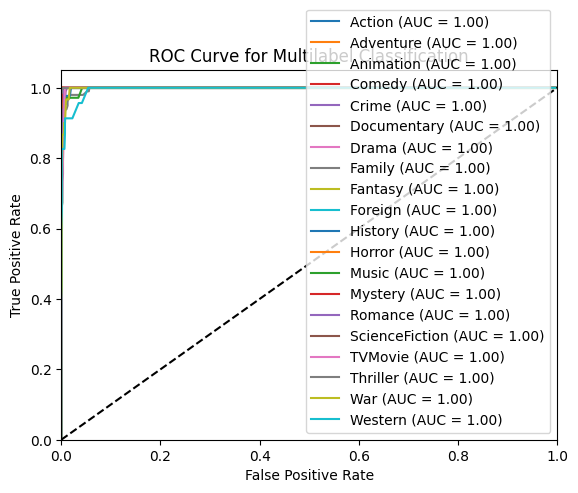

In [ ]:
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_curve, auc, f1_score
from sklearn.metrics import roc_auc_score
from sklearn.multiclass import OneVsRestClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import RocCurveDisplay

# 1. Using MultiLabelBinarizer to flatten the genres into a suitable format
mlb = MultiLabelBinarizer()
y = mlb.fit_transform(movies['genres'])

# 2. Convert the 'tags' column to strings before applying TfidfVectorizer
movies['tags'] = movies['tags'].apply(lambda x: ' '.join(x) if isinstance(x, list) else x)

# 3. TF-IDF Vectorization
tfidf = TfidfVectorizer(max_features=5000, stop_words='english', ngram_range=(1, 2))
X = tfidf.fit_transform(movies['tags']).toarray()

# 4. Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Train the Random Forest Classifier
rf = RandomForestClassifier(class_weight='balanced', random_state=42)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

# 6. Evaluate the model with accuracy and classification report
accuracy = accuracy_score(y_test, y_pred)
print(f"Random Forest Accuracy: {accuracy*100:.2f}%")
print(classification_report(y_test, y_pred, target_names=mlb.classes_))

# 7. Calculate the F1 Score
f1 = f1_score(y_test, y_pred, average='micro')  # You can use 'micro', 'macro', 'weighted'
print(f"F1 Score: {f1*100:.2f}%")

# 8. ROC Curve and AUC for multilabel classification
y_prob = rf.predict_proba(X_test)

# Use OneVsRestClassifier to handle multilabel classification
clf = OneVsRestClassifier(RandomForestClassifier(class_weight='balanced', random_state=42))
clf.fit(X_train, y_train)
y_score = clf.predict_proba(X_test)

# Compute ROC curve and AUC for each class
for i in range(y_test.shape[1]):
    fpr, tpr, _ = roc_curve(y_test[:, i], y_score[:, i])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{mlb.classes_[i]} (AUC = {roc_auc:.2f})')

# Plot formatting
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Multilabel Classification')
plt.legend(loc='lower right')
plt.show()



In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import classification_report, accuracy_score
ovr_nb = OneVsRestClassifier(MultinomialNB())
ovr_nb.fit(X_train, y_train)

y_pred_prob = ovr_nb.predict_proba(X_test)

threshold = 0.3
y_pred = (y_pred_prob >= threshold).astype(int)

accuracy = accuracy_score(y_test, y_pred)
print(f"Naive Bayes Accuracy: {accuracy*100:.2f}%")
print(classification_report(y_test, y_pred, target_names=mlb.classes_, zero_division=0))



Naive Bayes Accuracy: 26.30%
                precision    recall  f1-score   support

        Action       0.76      0.92      0.83       246
     Adventure       0.78      0.74      0.76       167
     Animation       1.00      0.25      0.40        44
        Comedy       0.74      0.97      0.84       346
         Crime       0.86      0.73      0.79       138
   Documentary       1.00      0.06      0.11        18
         Drama       0.68      0.98      0.80       460
        Family       0.98      0.56      0.71        98
       Fantasy       0.84      0.38      0.52        98
       Foreign       0.00      0.00      0.00         5
       History       1.00      0.16      0.28        43
        Horror       0.95      0.81      0.88       100
         Music       1.00      0.11      0.21        35
       Mystery       1.00      0.10      0.18        69
       Romance       0.83      0.81      0.82       195
ScienceFiction       0.97      0.71      0.82       119
       TVMovie    

In [ ]:
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.tree import DecisionTreeClassifier  # Correctly import DecisionTreeClassifier
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import classification_report, accuracy_score

# Create the base models
rf = RandomForestClassifier(class_weight='balanced', random_state=42)
dt = DecisionTreeClassifier(random_state=42)

#  VotingClassifier
voting_classifier = OneVsRestClassifier(VotingClassifier(
    estimators=[('random_forest', rf), ('decision_tree', dt)],
    voting='soft'  # You can also try 'hard' voting
))

# VotingClassifier on the training data
voting_classifier.fit(X_train, y_train)

#test data
y_pred = voting_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f"Voting Classifier Accuracy: {accuracy * 100:.2f}%")

#classification report
print(classification_report(y_test, y_pred, target_names=mlb.classes_, zero_division=0))



Voting Classifier Accuracy: 84.82%
                precision    recall  f1-score   support

        Action       0.97      0.98      0.97       246
     Adventure       0.93      0.95      0.94       167
     Animation       1.00      1.00      1.00        44
        Comedy       1.00      0.99      0.99       346
         Crime       0.94      0.91      0.93       138
   Documentary       0.81      0.94      0.87        18
         Drama       1.00      0.99      0.99       460
        Family       0.90      0.92      0.91        98
       Fantasy       0.97      0.94      0.95        98
       Foreign       1.00      0.80      0.89         5
       History       0.90      0.88      0.89        43
        Horror       0.97      0.97      0.97       100
         Music       0.86      0.89      0.87        35
       Mystery       0.97      0.97      0.97        69
       Romance       0.97      0.95      0.96       195
ScienceFiction       1.00      1.00      1.00       119
       TVMov

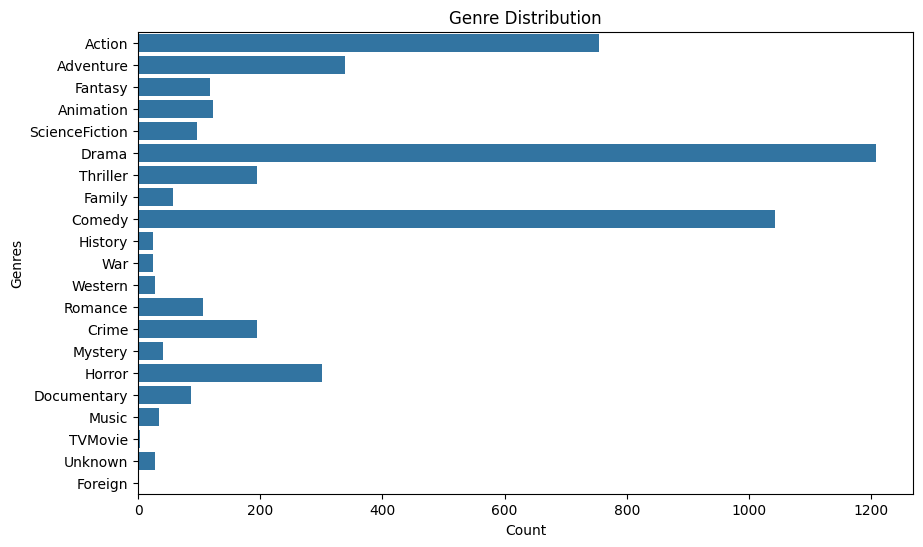

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.countplot(y=movies['genres'].apply(lambda x: x[0] if isinstance(x, list) and len(x) > 0 else 'Unknown'))
plt.title("Genre Distribution")
plt.xlabel("Count")
plt.ylabel("Genres")
plt.show()